# **CUSTOMER CHURN PREDICTION MODEL**

**WHAT IS CUSTOMER CHURN?**


*  Customer churn or customer attrition is the phenomenon where customers of a business no longer purchase or interact with the business.
*   A high churn means that higher number of customers no longer want to purchase goods and services from the business.


*  Customer churn is one of the most important metrics for a growing business to evaluate.  Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.

*  While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.









**HOW TO CALCULATE CUSTOMER CHURN RATE?**

Customer churn rate is the number of customers you have lost divided by the total number of customers.

    Customer Churn Rate = No. of Customers lost/Total no. of customers (Period) x 100

**REASON TO ANALYSE CUSTOMER CHURN**
1. To know what is causing customer churn and find solutions to reduce it.
2. To evaluate the performance of the implemented solution to reduce customer churn rate.



**CONSEQUENCES OF HIGH CUSTOMER CHURN**

When the churn rate increases it will be a negative impact on a business:
1. Cost of acquiring new customers is significantly higher than retention costs.
2.The rate of selling to an existing customer is at an average 60% higher than selling to a customer who is not familiar with your brand.
3.Existing customers, when satisfied are an excellent source for brand promotions through the organic spread of “word of mouth”. In other words, they become your brand promoters and recommend your brand to others, thereby increasing your overall customer base without you having to spend more on customer acquisition.

**HOW TO REDUCE CUSTOMER CHURN**


We can do the following things.
1. Focus your attention on your best customers.
2. Analyze churn as it occurs.
3. Show your customers that you care.
4. Ask your customers the right questions.
5. Offer more than usual to your loyal customers.



**WHAT IS THIS PROJECT ABOUT?**

In this Notebook, I will try to do detailed Exploratory data analysis(EDA) on Credit Card Dataset with Visualization. Let's extract different insights from data that help to find the behavior of the churned customer. From which we can provide them better services and turn customer's decisions in the opposite direction. Also,my goal is to predict customer churn from the dataset and gain some insights on how the bank can reduce the customers who have churned.

**ABOUT THE DATASET**

1. CLIENTNUM - Client number. Unique identifier for the customer holding the account.

2. Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0.

3. Customer_Age -Demographic variable - Customer's Age in Years.

4. Gender - Demographic variable - M=Male, F=Female.

5. Dependent_count - Demographic variable - Number of dependents.
6.Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school).
7.Marital_Status - Demographic variable - Married, Single, Divorced, Unknown.
8.Income_Category - Demographic variable - Annual Income Category of the account holder.
9.Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
10.Months_on_book - Period of relationship with bank.
11.Total_Relationship_Count-Total no. of products held by the customer.
12.Months_Inactive_12_mon - No. of months inactive in the last 12 months.
13.Contacts_Count_12_mon-No. of Contacts in the last 12 months.
14.Credit_Limit-Credit Limit on the Credit Card.
15.Total_Revolving_Bal-Total Revolving Balance on the Credit Card.
16.Avg_Open_To_Buy-Open to Buy Credit Line (Average of last 12 months).
17.Total_Amt_Chng_Q4_Q1- Open to Buy Credit Line (Average of last 12 months).
18.Total_Trans_Amt-Total Transaction Amount (Last 12 months).
19.Total_Trans_Ct- Total Transaction Count (Last 12 months).
20.Total_Ct_Chng_Q4_Q1-Change in Transaction Count (Q4 over Q1).
21.Avg_Utilization_Ratio-Average Card Utilization Ratio.

**NOTEBOOK CONTENTS**

1. Import The Libraries
2. Loading The Dataset.
3. Exploring the Dataframe
4. Checking NAN Values.
5. Checking for Duplicate Records.
6. Basic Statistics.
7. EDA & Visualization On Numerical Variables.
8. EDA & Visualization On Categorical Variables.
9. Encoding The Features.
10. Treating CLASS IMBALANCE.
11. Detecting and treating OUTLIERS.
12. Visualize The Correlation Between Dependent And Independent Features.
13. Scaling The Features.
14. Split Train & Test.
15. Visualize Model Score.
16. Hyper Parameter Tuning.
17. Checking The Best Estimators.
18. Train The Model With Best HyperParameters.
19. Plotting The Confusion Matrix.
20. Feature Importances.
21. Conclusion.
22. Credits.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT NECESSARY LIBRARIES**

In [2]:
import numpy as np # linear algebra....
import pandas as pd # data processing
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

#**LOADING THE DATASET**




In [5]:
df=pd.read_csv('/content/drive/MyDrive/GUVI/Final Project-Python/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Dropping clientnum, and last two columns

In [5]:
df = df.drop(['CLIENTNUM', df.columns[-1], df.columns[-2]], axis=1)

# **Explore the DATASET**

In [6]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [89]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df.shape

(10127, 20)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# **REMOVING DUPLICATE RECORDS:**

In [8]:
# Removing Duplicates from dataset
df = df.drop_duplicates()
df.shape

(10127, 20)

# **FINDING NULL VALUES IN EACH COLUMN:**

In [93]:
# Finding missing values in each column:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# **BASIC STATISTICS ON NUMERICAL VARIABLES:**

In [94]:
# Statistics on Numerical data:
round(df.describe(exclude = 'object'), 2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


# **EDA ON NUMERICAL FEATURES:**

# **Analysis on Age and grouping them:**

**Age is a continous feature**, there is a problem with Continous Variables in Machine Learning Models.
Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their *Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these **continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.


In [95]:
df.Customer_Age.describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [96]:
df.Customer_Age.value_counts()

Customer_Age
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: count, dtype: int64

In [9]:
# the minimum age of a customer is 26 and maximum age 73 so we can group them into 5 bins each bin width= 10
# Create a new column 'Age_Group'
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[25, 35, 45, 55, 65, 75], labels=[0, 1, 2, 3, 4])
# This line of code bins the values in the Customer_Age column into 5 different bins, and labels them from 0 to 4.
#Ages from 26-35 are labeled 0.
#Ages from 36-45 are labeled 1.
#Ages from 46-55 are labeled 2.
#Ages from 56-65 are labeled 3.
#Ages from 66-75 are labeled 4.

# Convert the 'Age_Group' column to numeric type
df['Age_Group'] = df['Age_Group'].astype(int)

# Drop customer_age
df.drop(['Customer_Age'],axis = 1,inplace = True)


In [10]:
# Count the occurrences of each category
df.Age_Group.value_counts()

,count
Age_Group,
2,4135
1,3742
3,1321
0,919
4,10


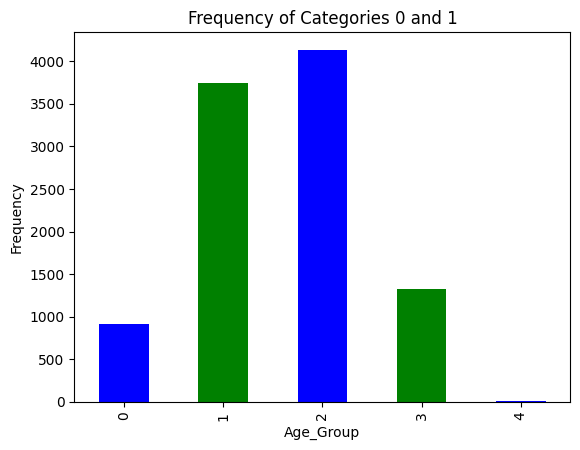

In [99]:
# Count the occurrences of each category
category_counts = df['Age_Group'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Age_Group')
plt.ylabel('Frequency')
plt.title('Frequency of Categories 0 and 1')

# Display the chart
plt.show()

In [11]:
# Visualize ATTRITION RATE in each AGE GROUP:
fig = px.histogram(df, x="Age_Group", color ="Attrition_Flag", pattern_shape="Attrition_Flag")


fig.update_layout(bargap=0.2)

fig.show()

# **EDA on DEPENDENT COUNT:**

In [12]:
df.Dependent_count.value_counts()

,count
Dependent_count,
3,2732
2,2655
1,1838
4,1574
0,904
5,424


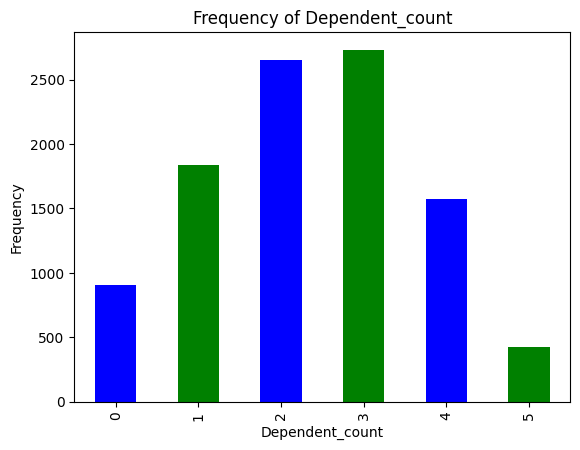

In [14]:
# Count the occurrences of each category
category_counts = df['Dependent_count'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Dependent_count')
plt.ylabel('Frequency')
plt.title('Frequency of Dependent_count')

# Display the chart
plt.show()

In [15]:
# Visualize ATTRITION RATE in each Dependent_count:
fig = px.histogram(df, x="Dependent_count", color ="Attrition_Flag", pattern_shape="Attrition_Flag")


fig.update_layout(bargap=0.2)

fig.show()

# **EDA on MONTHS INACTIVE**

In [16]:
df.Months_Inactive_12_mon.value_counts()

,count
Months_Inactive_12_mon,
3,3846
2,3282
1,2233
4,435
5,178
6,124
0,29


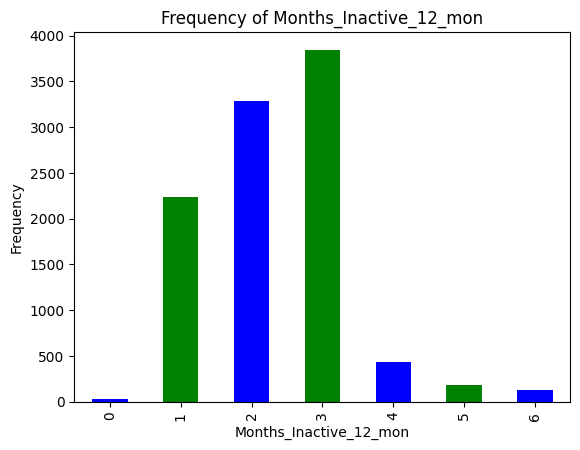

In [17]:
# Count the occurrences of each category
category_counts = df['Months_Inactive_12_mon'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('Frequency')
plt.title('Frequency of Months_Inactive_12_mon')

# Display the chart
plt.show()

In [18]:
# Visualize ATTRITION RATE in each Months_Inactive_12_mon:
fig = px.histogram(df, x="Months_Inactive_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag")


fig.update_layout(bargap=0.2)

fig.show()

# **EDA on CONTACTS COUNT IN THE LAST 12 MONTHS**

In [19]:
df.Contacts_Count_12_mon.value_counts()

,count
Contacts_Count_12_mon,
3,3380
2,3227
1,1499
4,1392
0,399
5,176
6,54


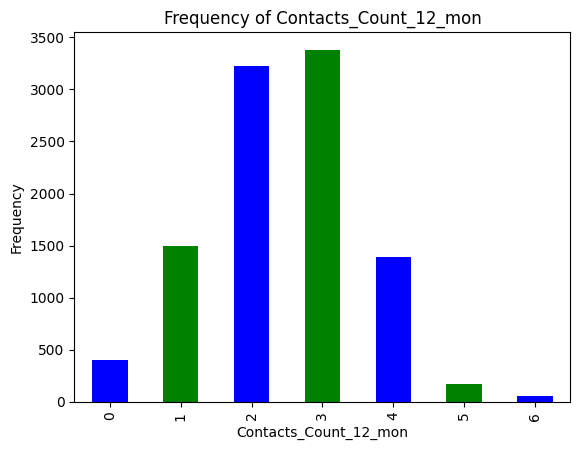

In [20]:
# Count the occurrences of each category
category_counts = df['Contacts_Count_12_mon'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Contacts_Count_12_mon')
plt.ylabel('Frequency')
plt.title('Frequency of Contacts_Count_12_mon')

# Display the chart
plt.show()

In [21]:
# Visualize ATTRITION RATE in each Months_Inactive_12_mon:
fig = px.histogram(df, x="Contacts_Count_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag")


fig.update_layout(bargap=0.2)

fig.show()

# **What are the categorical variables in the dataset??**

In [100]:
categorical = [x for x in df.columns if df[x].dtype=='O'] ## list comprehension  ## checking for the datatype of the column

print('There are {} categorical variables\n'.format(len(categorical)))  ## how many categorical var are there

print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [101]:
df[categorical].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


# **BASIC STATISTICS ON CATEGORICAL FEATURES:**

In [102]:
# Statistics on Categorical data:
round(df.describe(exclude = ['float', 'int64']),2)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


# **Encoding target variable to NUMERICAL values:**

Exploring and Encoding Attrition flag column to numerical values; existing customer as 0 and attrited customer as 1 using map function

In [103]:
# Attrition_Flag is the target variable in this model
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [104]:
df.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [105]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [106]:
df.Attrition_Flag.unique()

array([0, 1])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [108]:
df[categorical].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,M,High School,Married,$60K - $80K,Blue
1,0,F,Graduate,Single,Less than $40K,Blue
2,0,M,Graduate,Married,$80K - $120K,Blue
3,0,F,High School,Unknown,Less than $40K,Blue
4,0,M,Uneducated,Married,$60K - $80K,Blue


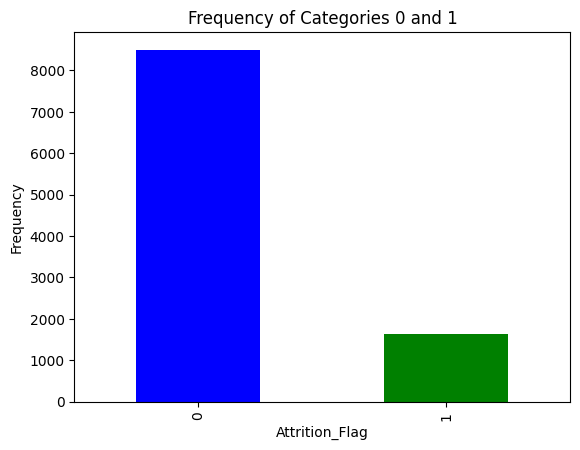

In [109]:
# Count the occurrences of each category
category_counts = df['Attrition_Flag'].value_counts().sort_index()
# Check if category_counts is empty and print a message if so
if category_counts.empty:
    print("Warning: 'Attrition_Flag' column is empty or mapping failed.")
else:
  # Create the bar chart
  category_counts.plot(kind='bar', color=['blue', 'green'])

  # Add titles and labels
  plt.xlabel('Attrition_Flag')
  plt.ylabel('Frequency')
  plt.title('Frequency of Categories 0 and 1')

# Display the chart
  plt.show()

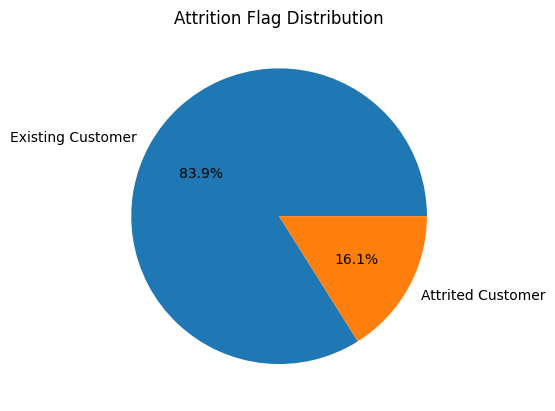

In [6]:
# Count the occurrences of each category
category_counts = df['Attrition_Flag'].value_counts()

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Attrition Flag Distribution')

# Display the chart
plt.show()

In [110]:
# Attrition_Flag has now been encoded to numerical values
## Class IMBALANCE:  we can see that there is less data on attrited customer

# Initial Feature selection by checking correlation with target variable

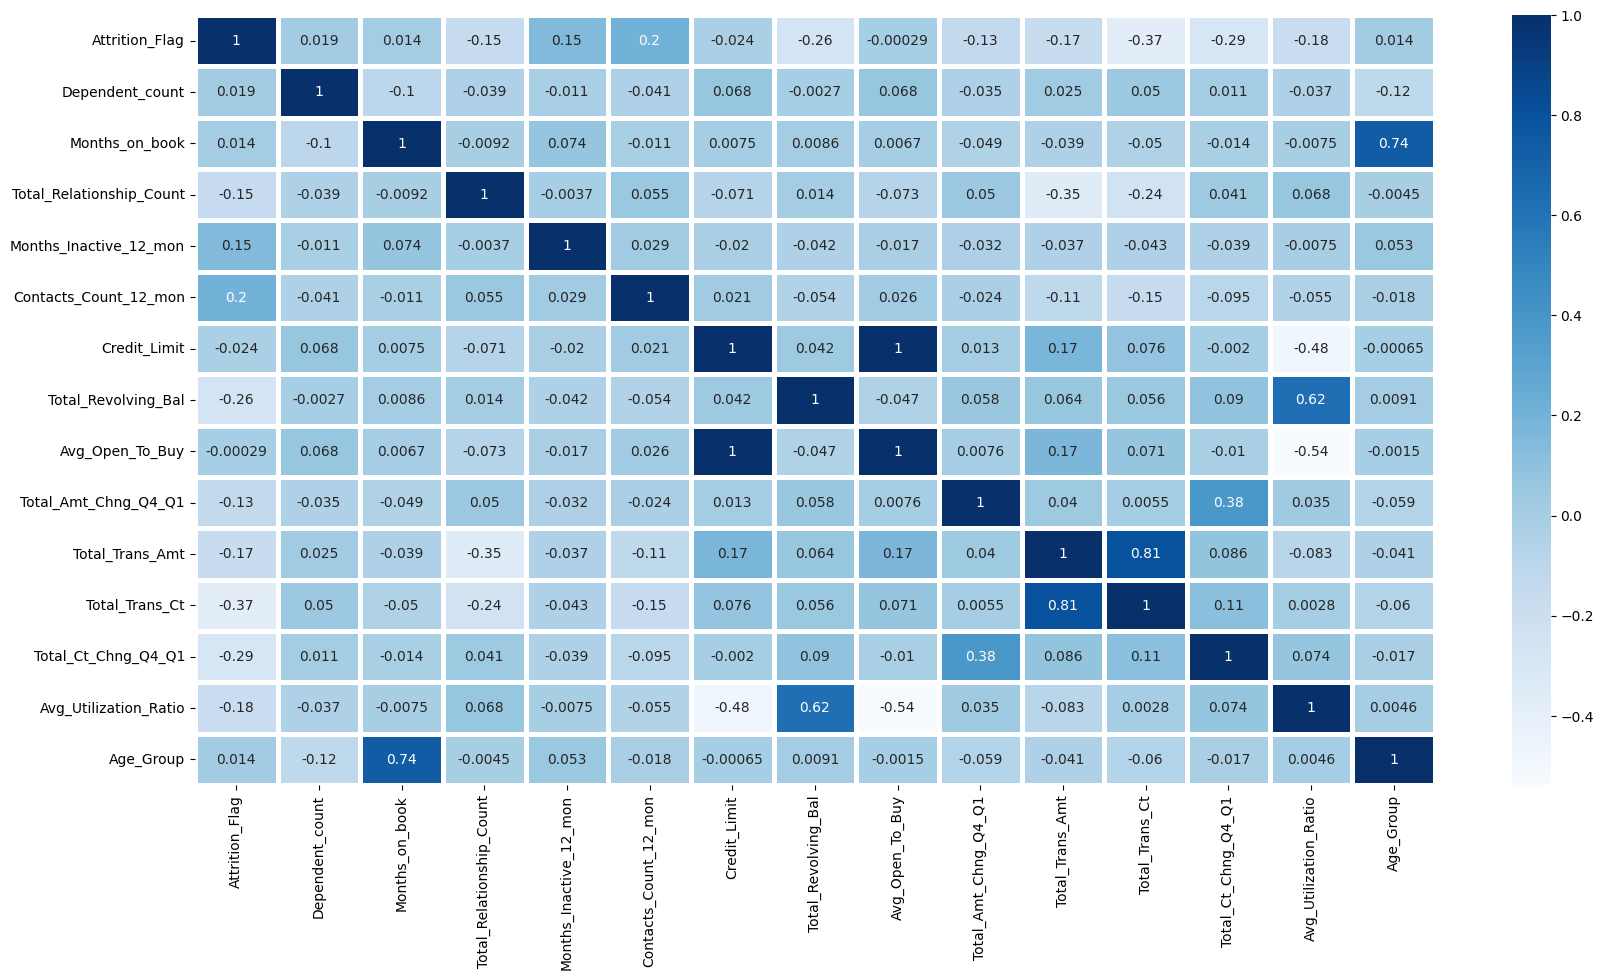

In [111]:
import seaborn as sns
numerical_df = df.select_dtypes(include=['float', 'int', 'bool'])
plt.figure(figsize=(20,10))

#plot heat map
g=sns.heatmap(numerical_df.corr(),annot=True,cmap="Blues",linewidths=3.5,linecolor='white')

In [112]:
# By checking correlation we Select features highly correlated with the target variable and low correlation with each other.
df = df.drop(['Months_on_book', 'Total_Relationship_Count', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Avg_Utilization_Ratio'], axis=1)

# **EDA on CATEGORICAL VARIABLES**

# Exploration and Analysis on Gender:

In [113]:
#Value count of each gender category:
df.Gender.value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

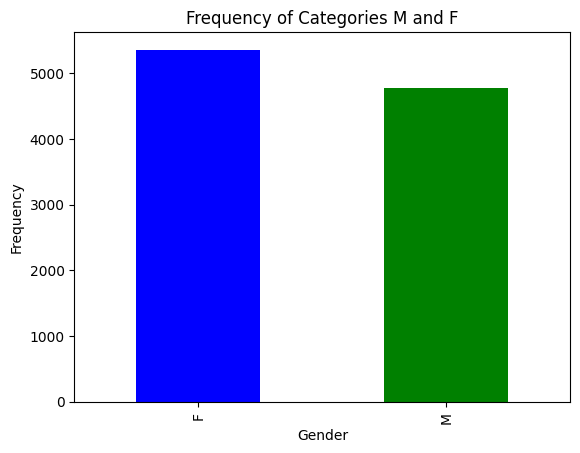

In [114]:
# Count the occurrences of each category
category_counts = df['Gender'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Categories M and F')

# Display the chart
plt.show()

In [115]:
fig = px.histogram(df, x="Gender", color ="Attrition_Flag", pattern_shape="Attrition_Flag")


fig.update_layout(bargap=0.2)

fig.show()

# Exploration and Analysis on Education level:

In [116]:
#Value count of each education level:

df.Education_Level.value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

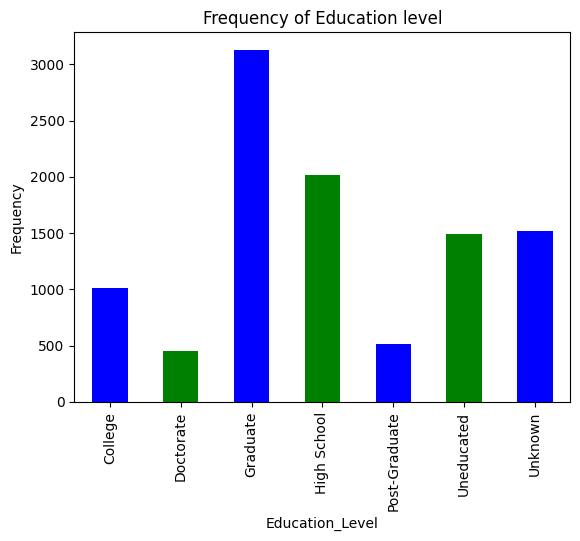

In [117]:
# Count the occurrences of each category
category_counts = df['Education_Level'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Education_Level')
plt.ylabel('Frequency')
plt.title('Frequency of Education level')

# Display the chart
plt.show()

In [118]:
fig = px.histogram(df, x="Education_Level", color ="Attrition_Flag", pattern_shape="Attrition_Flag")

fig.update_layout(bargap=0.2)

fig.show()

# Exploration and analysis on Marital Status:

In [119]:
df.Marital_Status.value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

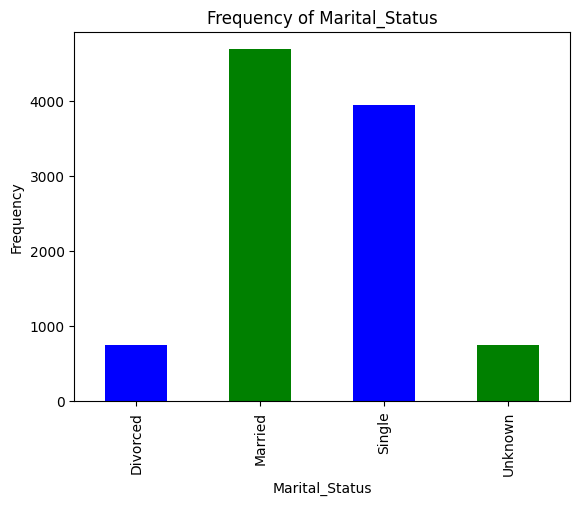

In [120]:
# Count the occurrences of each category
category_counts = df['Marital_Status'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Marital_Status')
plt.ylabel('Frequency')
plt.title('Frequency of Marital_Status')

# Display the chart
plt.show()

In [121]:
fig = px.histogram(df, x="Marital_Status", color ="Attrition_Flag", pattern_shape="Attrition_Flag")

fig.update_layout(bargap=0.2)

fig.show()

# Exploration and analysis on Income Category :

In [122]:
df.Income_Category.value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

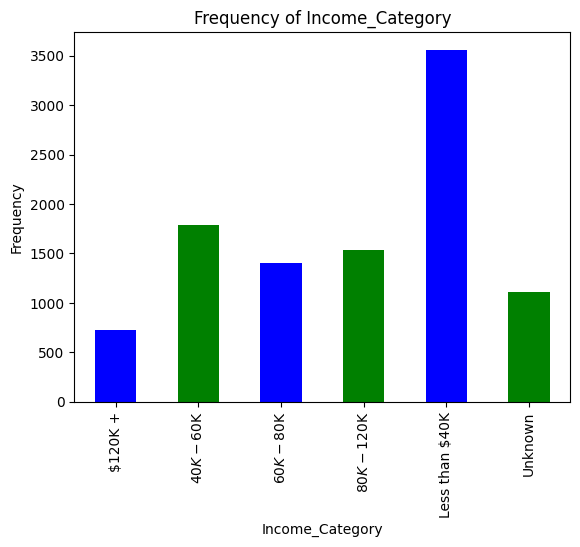

In [123]:
# Count the occurrences of each category
category_counts = df['Income_Category'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Income_Category')
plt.ylabel('Frequency')
plt.title('Frequency of Income_Category')

# Display the chart
plt.show()

In [124]:
fig = px.histogram(df, x="Income_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag")

fig.update_layout(bargap=0.2)

fig.show()

# Exploration and analysis on Card Category:

In [125]:
df.Card_Category.value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

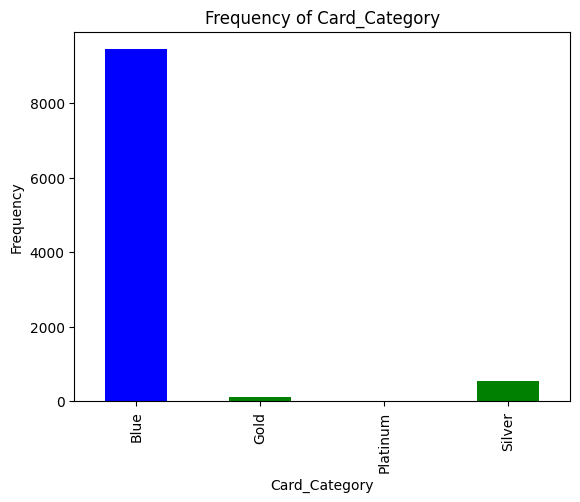

In [126]:
# Count the occurrences of each category
category_counts = df['Card_Category'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Card_Category')
plt.ylabel('Frequency')
plt.title('Frequency of Card_Category')

# Display the chart
plt.show()

In [127]:
fig = px.histogram(df, x="Card_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag")

fig.update_layout(bargap=0.2)

fig.show()

In [128]:
df.columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Age_Group'],
      dtype='object')

# Encoding Categorical variables using one hot encoding since each column has lesser than 10 categories:

In [129]:
#Now doing one hot encoding
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df_new.shape)

(10127, 32)


In [130]:
df_new.columns

Index(['Attrition_Flag', 'Dependent_count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Age_Group', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [131]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_Inactive_12_mon          10127 non-null  int64  
 3   Contacts_Count_12_mon           10127 non-null  int64  
 4   Credit_Limit                    10127 non-null  float64
 5   Total_Revolving_Bal             10127 non-null  int64  
 6   Total_Trans_Ct                  10127 non-null  int64  
 7   Total_Ct_Chng_Q4_Q1             10127 non-null  float64
 8   Age_Group                       10127 non-null  int64  
 9   Gender_F                        10127 non-null  bool   
 10  Gender_M                        10127 non-null  bool   
 11  Education_Level_College         10127 non-null  bool   
 12  Education_Level_Doctorate       

# Treating CLASS IMBALANCE:

In [132]:
df_new.Attrition_Flag.value_counts()
# Here you can observe that the information/data on Attrited/Churned customer is lesser.
# So over-samplying may be applied in this case since the dataset size is small.

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

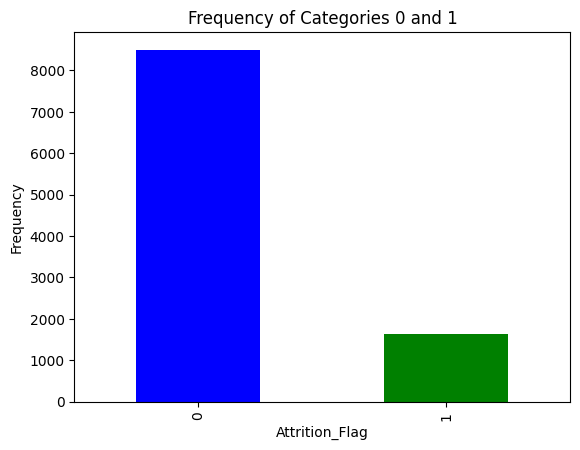

In [133]:
# Count the occurrences of each category
category_counts = df['Attrition_Flag'].value_counts().sort_index()

# Create the bar chart
category_counts.plot(kind='bar', color=['blue', 'green'])

# Add titles and labels
plt.xlabel('Attrition_Flag')
plt.ylabel('Frequency')
plt.title('Frequency of Categories 0 and 1')

# Display the chart
plt.show()

In [134]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
y = df_new['Attrition_Flag']
X = df_new.drop('Attrition_Flag', axis=1)

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Attrition_Flag'])], axis=1)

In [135]:
balanced_df.shape

(17000, 32)

In [136]:
balanced_df.Attrition_Flag.value_counts()

Attrition_Flag
0    8500
1    8500
Name: count, dtype: int64

# Detecting Outliers in Numerical variables and treating them:

# Outlier Detection and treatment in CREDIT LIMIT :

In [137]:
#First, calculate the first (Q1) and third (Q3) quartiles.

Q1_1 = balanced_df['Credit_Limit'].quantile(0.25)
Q3_1 = balanced_df['Credit_Limit'].quantile(0.75)

# Next, calculate the IQR.
IQR = Q3_1 - Q1_1

# Finally, calculate the upper and lower bounds for outliers.
lower_bound_1 = Q1_1 - 1.5 * IQR
upper_bound_1 = Q3_1 + 1.5 * IQR

# Now, use the bounds to identify outliers.
outliers = balanced_df[(balanced_df['Credit_Limit'] < lower_bound_1) | (balanced_df['Credit_Limit'] > upper_bound_1)]
num_outliers = outliers.shape[0]
print(num_outliers)

1770


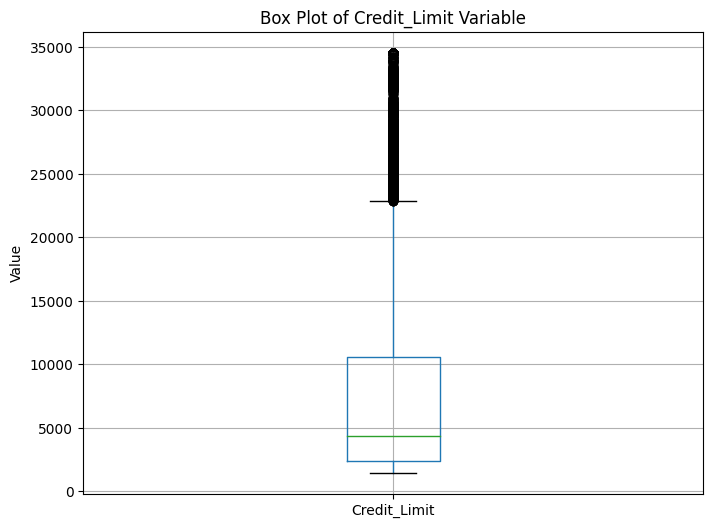

In [138]:
# Create the box plot for Credit_Limit:
plt.figure(figsize=(8, 6))
balanced_df.boxplot(column='Credit_Limit')

# Add titles and labels
plt.title('Box Plot of Credit_Limit Variable')
plt.ylabel('Value')

# Display the plot
plt.show()

In [139]:
#Lets impute outliers with median value:
median_value = balanced_df['Credit_Limit'].median()
balanced_df['Credit_Limit'] = np.where(
    (balanced_df['Credit_Limit'] < lower_bound_1) | (balanced_df['Credit_Limit'] > upper_bound_1),
    median_value,
    balanced_df['Credit_Limit']
)

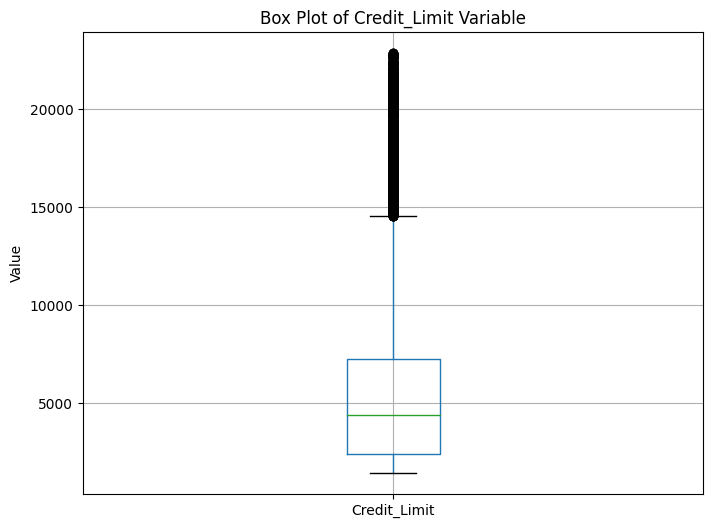

In [140]:
# Now lets see the box plot for crefit limit without outliers:
plt.figure(figsize=(8, 6))
balanced_df.boxplot(column='Credit_Limit')

# Add titles and labels
plt.title('Box Plot of Credit_Limit Variable')
plt.ylabel('Value')

# Display the plot
plt.show()

# Outlier Detection and treatment in Total_Trans_Ct :

In [141]:
#First, calculate the first (Q1) and third (Q3) quartiles.

Q1_2 = balanced_df['Total_Trans_Ct'].quantile(0.25)
Q3_2 = balanced_df['Total_Trans_Ct'].quantile(0.75)

# Next, calculate the IQR.
IQR = Q3_2 - Q1_2

# Finally, calculate the upper and lower bounds for outliers.
lower_bound_2= Q1_2 - 1.5 * IQR
upper_bound_2 = Q3_2 + 1.5 * IQR

# Now, use the bounds to identify outliers.
outliers = balanced_df[(balanced_df['Total_Trans_Ct'] < lower_bound_2) | (balanced_df['Total_Trans_Ct'] > upper_bound_2)]
num_outliers = outliers.shape[0]
print(num_outliers)

108


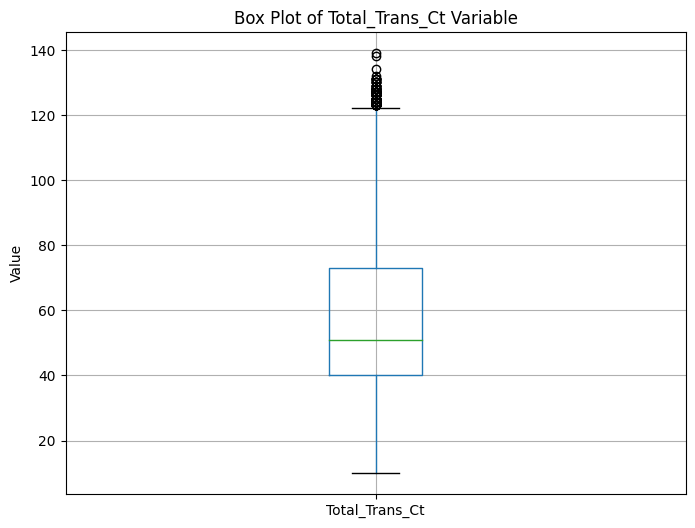

In [142]:
# Create the box plot
plt.figure(figsize=(8, 6))
balanced_df.boxplot(column='Total_Trans_Ct')

# Add titles and labels
plt.title('Box Plot of Total_Trans_Ct Variable')
plt.ylabel('Value')

# Display the plot
plt.show()

In [143]:
# Removing the Outliers in Total_Trans_Ct:
balanced_df = balanced_df[(balanced_df['Total_Trans_Ct'] >= lower_bound_2) & (balanced_df['Total_Trans_Ct'] <= upper_bound_2)]

In [144]:
balanced_df.shape

(16892, 32)

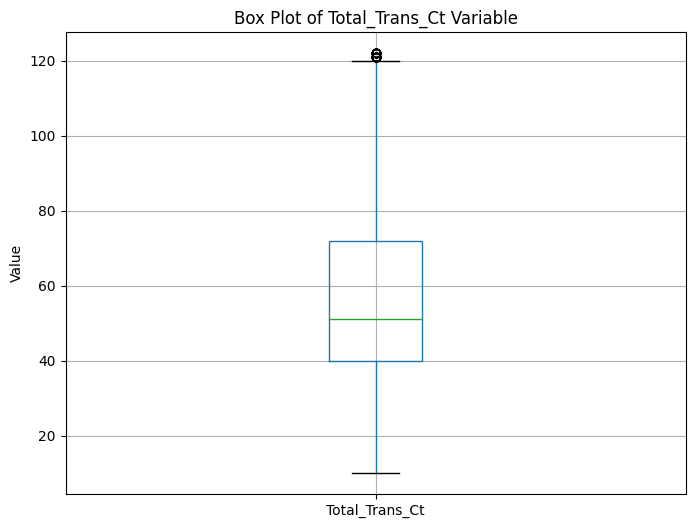

In [145]:
# Now lets see the box plot of Total_Trans_Ct without outliers
plt.figure(figsize=(8, 6))
balanced_df.boxplot(column='Total_Trans_Ct')

# Add titles and labels
plt.title('Box Plot of Total_Trans_Ct Variable')
plt.ylabel('Value')

# Display the plot
plt.show()

# Outlier Detection and Treatment on Total_Ct_Chng_Q4_Q1:

In [146]:
#First, calculate the first (Q1) and third (Q3) quartiles.

Q1_3 = balanced_df['Total_Ct_Chng_Q4_Q1'].quantile(0.25)
Q3_3 = balanced_df['Total_Ct_Chng_Q4_Q1'].quantile(0.75)

# Next, calculate the IQR.
IQR = Q3_3 - Q1_3

# Finally, calculate the upper and lower bounds for outliers.
lower_bound_3 = Q1_3 - 1.5 * IQR
upper_bound_3 = Q3_3 + 1.5 * IQR

# Now, use the bounds to identify outliers.
outliers = balanced_df[(balanced_df['Total_Ct_Chng_Q4_Q1'] < lower_bound_3) | (balanced_df['Total_Ct_Chng_Q4_Q1'] > upper_bound_3)]
num_outliers = outliers.shape[0]
print(num_outliers)


337


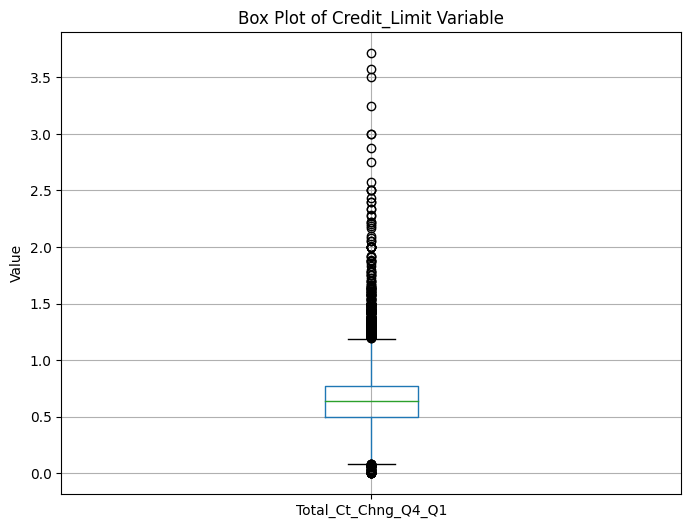

In [147]:
# Create the box plot
plt.figure(figsize=(8, 6))
balanced_df.boxplot(column='Total_Ct_Chng_Q4_Q1')

# Add titles and labels
plt.title('Box Plot of Credit_Limit Variable')
plt.ylabel('Value')

# Display the plot
plt.show()

In [148]:
#Lets impute outliers with median value:
median_value = balanced_df['Total_Ct_Chng_Q4_Q1'].median()
balanced_df['Total_Ct_Chng_Q4_Q1'] = np.where(
    (balanced_df['Total_Ct_Chng_Q4_Q1'] < lower_bound_3) | (balanced_df['Total_Ct_Chng_Q4_Q1'] > upper_bound_3),
    median_value,
    balanced_df['Total_Ct_Chng_Q4_Q1']
)

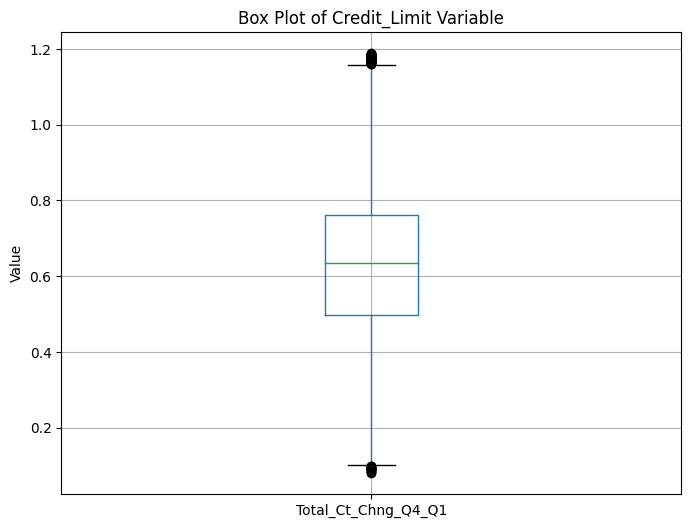

In [149]:
# Now lets see the box plot of Total_Ct_Chng_Q4_Q1 without outliers:
plt.figure(figsize=(8, 6))
balanced_df.boxplot(column='Total_Ct_Chng_Q4_Q1')

# Add titles and labels
plt.title('Box Plot of Credit_Limit Variable')
plt.ylabel('Value')

# Display the plot
plt.show()

In [150]:
balanced_df.Attrition_Flag.value_counts()

Attrition_Flag
1    8500
0    8392
Name: count, dtype: int64

# New Correlation matrix

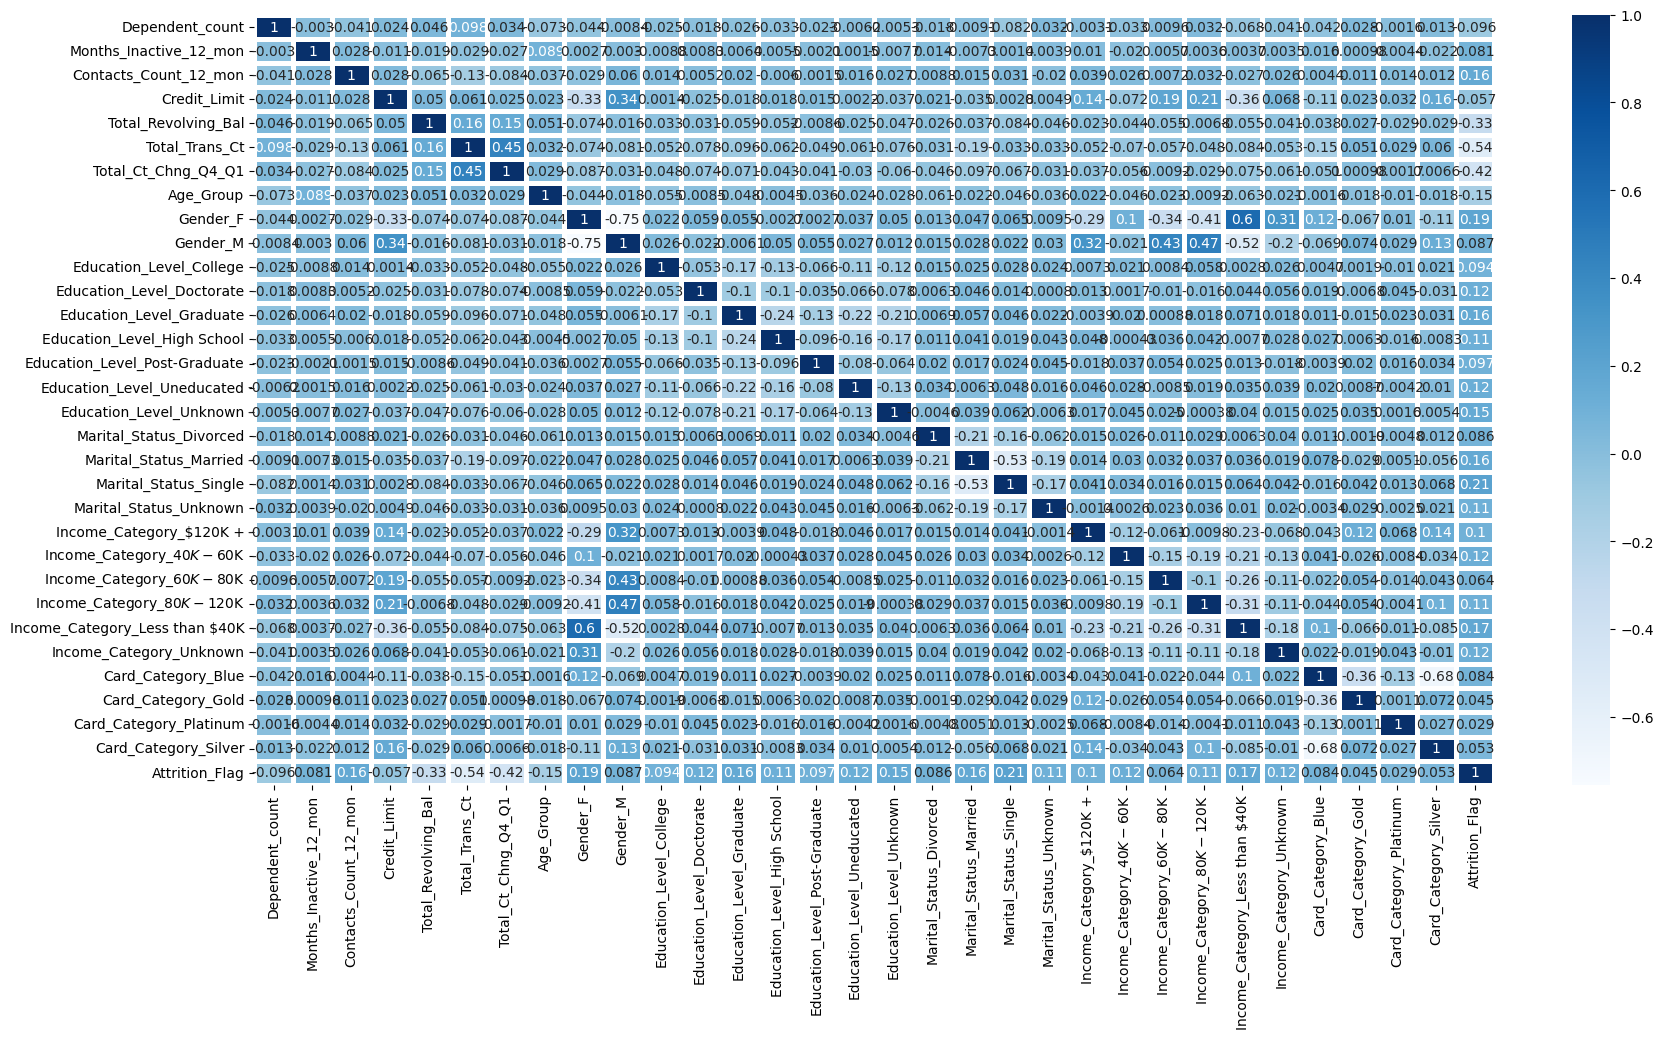

In [151]:
import seaborn as sns
numerical_df = balanced_df.select_dtypes(include=['float', 'int', 'bool'])
plt.figure(figsize=(20,10))

#plot heat map
g=sns.heatmap(numerical_df.corr(),annot=True,cmap="Blues",linewidths=3.5,linecolor='white')

In [152]:
df= balanced_df

# **SCALING the DATASET**

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))

In [154]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head()

,Dependent_count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Age_Group,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.6,0.166667,0.500000,0.524942,0.308701,0.285714,0.50129,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.166667,0.333333,0.318048,0.343266,0.205357,0.50129,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.6,0.166667,0.000000,0.092354,0.000000,0.089286,0.50129,0.50,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.8,0.666667,0.166667,0.087455,1.000000,0.089286,0.50129,0.25,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.6,0.166667,0.000000,0.152906,0.000000,0.160714,0.50129,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#**X and Y SPLIT**

In [155]:
X = scaled_features                ### independent
y = df['Attrition_Flag']           ### target or dependent

# **SPLIT THE DATASET INTO TRAIN AND TEST**

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

In [157]:
X_test.head()

,Dependent_count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Age_Group,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
12733,0.6,0.166667,0.500000,0.001198,0.425904,0.187500,0.375116,0.25,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5141,0.4,0.500000,0.666667,0.039406,0.405244,0.517857,0.942283,0.50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12802,0.4,0.333333,0.333333,0.506958,0.000000,0.232143,0.204930,0.25,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7115,0.6,0.666667,0.333333,0.164988,0.485101,0.517857,0.729452,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12648,0.0,0.166667,0.666667,0.123790,0.195074,0.446429,0.511164,0.00,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# **Visualize the MODEL SCORES**

In [158]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score #,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [159]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionaries to store results
results_train = {}
results_test = {}

# K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    # Cross-validation
    cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    results_train[name] = {
        'CrossVal_Score_Mean': cv_results.mean(),
        'CrossVal_Error': cv_results.std()
    }

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    clf_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store the evaluation metrics
    results_test[name] = {
        'Accuracy': accuracy,
        'F1_Score': f1,
        'ROC_AUC_Score': roc_auc,
        'Classification_Report': clf_report,
        'Confusion_Matrix': cm
    }

# Print the cross-validation results
for name, result in results_train.items():
    print(f"{name} (Training):")
    print(f"  CrossVal_Score_Mean: {result['CrossVal_Score_Mean']:.4f}")
    print(f"  CrossVal_Error: {result['CrossVal_Error']:.4f}")
    print()

# Print the test results
for name, result in results_test.items():
    print(f"{name} (Test):")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1_Score: {result['F1_Score']:.4f}")
    print(f"  ROC_AUC_Score: {result['ROC_AUC_Score']}")
    print(f"  Classification_Report:\n{result['Classification_Report']}")
    print(f"  Confusion_Matrix:\n{result['Confusion_Matrix']}\n")


Logistic Regression (Training):
  CrossVal_Score_Mean: 0.9282
  CrossVal_Error: 0.0053

Random Forest (Training):
  CrossVal_Score_Mean: 0.9436
  CrossVal_Error: 0.0044

AdaBoost (Training):
  CrossVal_Score_Mean: 0.9226
  CrossVal_Error: 0.0050

Bagging (Training):
  CrossVal_Score_Mean: 0.9226
  CrossVal_Error: 0.0065

Extra Trees (Training):
  CrossVal_Score_Mean: 0.9405
  CrossVal_Error: 0.0053

Gradient Boosting (Training):
  CrossVal_Score_Mean: 0.9332
  CrossVal_Error: 0.0029

XGBoost (Training):
  CrossVal_Score_Mean: 0.9465
  CrossVal_Error: 0.0034

Decision Tree (Training):
  CrossVal_Score_Mean: 0.8896
  CrossVal_Error: 0.0089

SVM (Training):
  CrossVal_Score_Mean: 0.9322
  CrossVal_Error: 0.0061

KNN (Training):
  CrossVal_Score_Mean: 0.9027
  CrossVal_Error: 0.0099

Naive Bayes (Training):
  CrossVal_Score_Mean: 0.8456
  CrossVal_Error: 0.0098

Logistic Regression (Test):
  Accuracy: 0.9294
  F1_Score: 0.9275
  ROC_AUC_Score: 0.9761381935294978
  Classification_Report:
  

In [160]:
classifiers

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'Bagging': BaggingClassifier(),
 'Extra Trees': ExtraTreesClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_

# **HYPER PARAMETER TUNING**

In [161]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Training the final model with best HYPER PARAMETERS

In [162]:
# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:, 1]

# Make predictions on the test set
y_test_pred = best_rf.predict(X_test)
y_test_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_clf_report = classification_report(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
test_clf_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Metrics:")
print(f"  Accuracy: {train_accuracy:.4f}")
print(f"  F1_Score: {train_f1:.4f}")
print(f"  ROC_AUC_Score: {train_roc_auc:.4f}")
print(f"  Classification_Report:\n{train_clf_report}")
print(f"  Confusion_Matrix:\n{train_cm}\n")

print("Test Metrics:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  F1_Score: {test_f1:.4f}")
print(f"  ROC_AUC_Score: {test_roc_auc:.4f}")
print(f"  Classification_Report:\n{test_clf_report}")
print(f"  Confusion_Matrix:\n{test_cm}\n")

Training Metrics:
  Accuracy: 1.0000
  F1_Score: 1.0000
  ROC_AUC_Score: 1.0000
  Classification_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5862
           1       1.00      1.00      1.00      5962

    accuracy                           1.00     11824
   macro avg       1.00      1.00      1.00     11824
weighted avg       1.00      1.00      1.00     11824

  Confusion_Matrix:
[[5862    0]
 [   0 5962]]

Test Metrics:
  Accuracy: 0.9475
  F1_Score: 0.9474
  ROC_AUC_Score: 0.9894
  Classification_Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2530
           1       0.95      0.94      0.95      2538

    accuracy                           0.95      5068
   macro avg       0.95      0.95      0.95      5068
weighted avg       0.95      0.95      0.95      5068

  Confusion_Matrix:
[[2406  124]
 [ 142 2396]]



# **Feature Importance**

In [163]:
feature = pd.Series(best_rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Ct                    0.250899
Total_Revolving_Bal               0.151603
Total_Ct_Chng_Q4_Q1               0.132078
Credit_Limit                      0.055509
Marital_Status_Single             0.035986
Months_Inactive_12_mon            0.035691
Contacts_Count_12_mon             0.030785
Age_Group                         0.029317
Marital_Status_Married            0.027116
Gender_F                          0.025537
Dependent_count                   0.025239
Gender_M                          0.022326
Education_Level_Graduate          0.017281
Income_Category_Less than $40K    0.016239
Education_Level_Unknown           0.014924
Income_Category_$80K - $120K      0.014140
Education_Level_High School       0.012748
Education_Level_Uneducated        0.012036
Income_Category_$40K - $60K       0.011606
Income_Category_$60K - $80K       0.011047
Marital_Status_Unknown            0.009840
Income_Category_$120K +           0.008865
Income_Category_Unknown           0.008766
Education_L

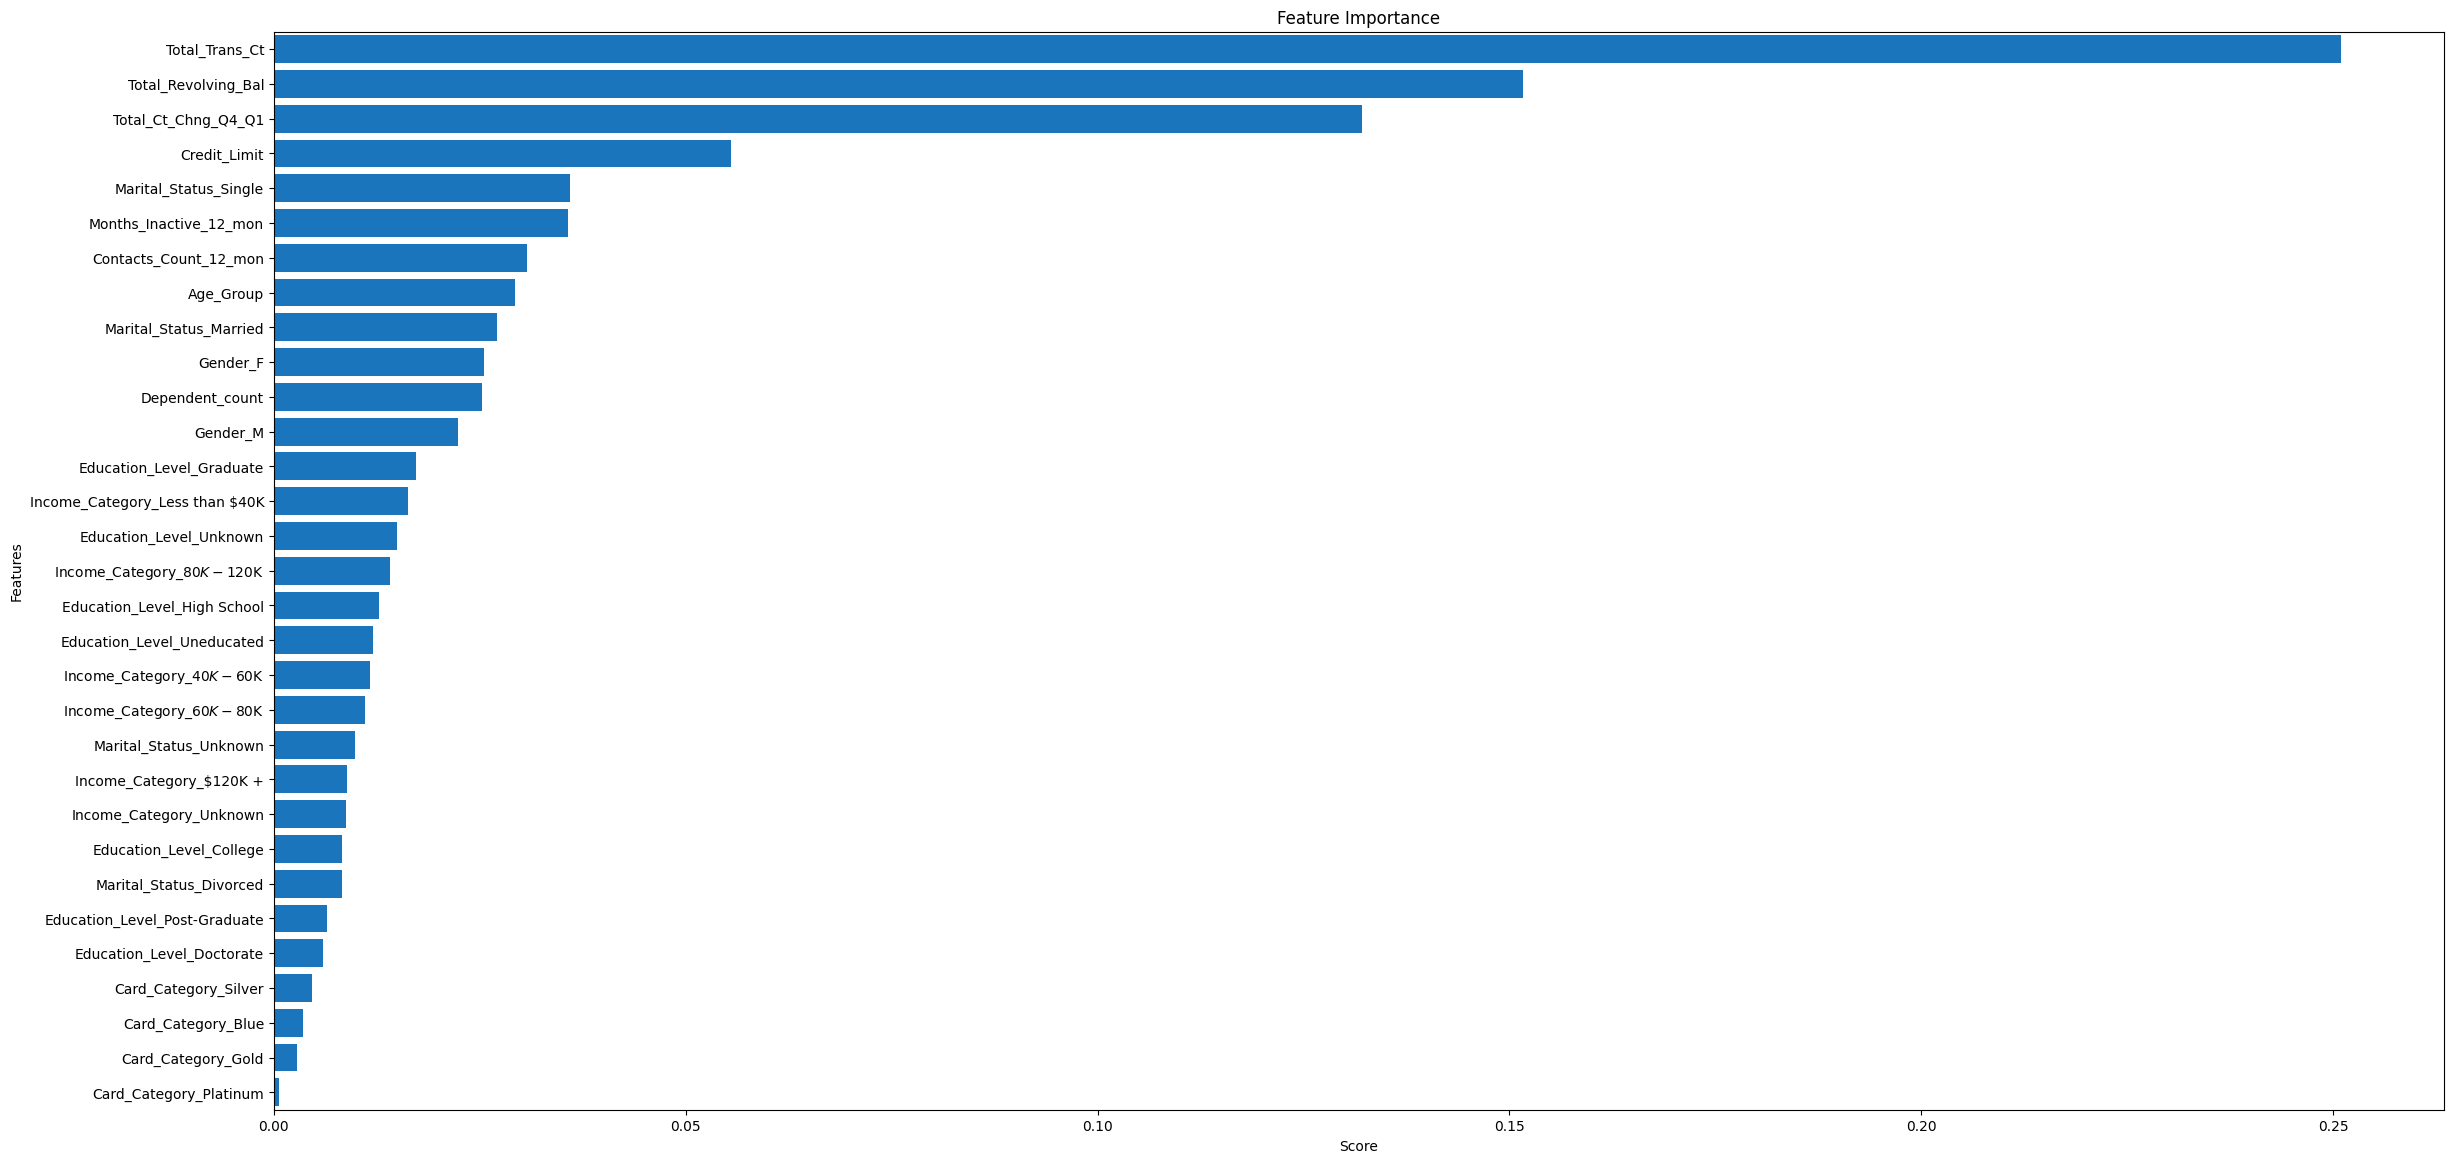

In [164]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

# **SUMMARY OF MODEL BUILDING**


*   Firstly we have imported necessary libraries and loaded the dataset.
*   We have done basic analysis on the dataframe and removed duplicate entries. Initial Feature selection is done by using correlation matrix.
*   During the Explorartory Data Analysis we can find some insights on attrition rates in different categories and attrition column having class imbalance.
*  Grouping age column.
*   We have done ONE HOT ENCODING in order to convert the categorical variables to numerical.
*   Treating class imbalance by implementing over sampling technique.
*   Detecting and treating the outliers in numerical features.
*   Scaling the Independent Features.
*   X and Y split followed by Train and Test Split.
*   Model building and analysing model scores for different classification models.
*   Hyper parameter tuning by using Grid CV search and training the random forest model with best hyper parameters.
*   Deriving the Important Features that influence the attrition flag/ customer churn.



# **INSIGHTS**:


1.   There are about **16.06% of attrited customer**s (cutomers who have left/churned).
2.   The percentage of attrited customers is significantly lesser compared to 83.9% of existing cutomer which reflect **class imbalance**.
3.   In churned customers the percentage of **FEMALE (57%) is higher** than MALE (43%) customers.
4.   Customers with higher education level like **GRADUATES (29.93%) followed by HIGH SCHOOL(18.8%)** tend to churn more compared to others.
5.   Customers who are under **MARRIED (43.57%) and SINGLE (41.05%)** marital status tend to churn more.
6.   Cutomers in Income Category **LESS THAN $40K, $40K - $60K and $80K - $120K** tend to churn more.
7.   Customers in **BLUE card category** are the ones who churn more.
8.   Customers in the **AGE GROUP 2 (age:46-55) and 1 (age:36-45)** tend to churn more. Customers who are middle aged 36 to 55 tend to churn more.
9. High attrition is seen in customers who were **inactive for the last 3 and 2 months**.
10.  Customers with **2 and 3 dependents** have highly churned.
11.  Customers who have **contacted only 2 to 3 times** in the last 12 months have high attrition rates.



# **CONCLUSION**
1. **After completing**  the **processing** and seperating the dataset into **TEST and TRAIN** sets, the **model with high accuracy** is seleted and trained with **best hyperparameters**.
2. The **RANDOM FOREST MODEL** provides **94.755% Accuarcy and 0.98 ROC AUC SCORE** in predicting churn of test set.
3.   **Features that highly influence attrition rate**: Total Transaction Count, Total Revolving Balance, Total Trans.Count Change Q4-Q1, Credit Limit, Marital Status-Single.

# **SUGGESTIONS TO REDUCE CHURN RATE:**
**1.Targeted Offers:**
* Create gender-specific promotions and education-level-based financial products.
* Offer income-sensitive credit cards with tailored rewards.

**2.Loyalty Enhancements:**
* Improve rewards for BLUE cardholders and design targeted campaigns for married and single customers.

**3.Engage Middle-Aged Customers:**
* Provide personalized communication and services relevant to their life stage.

**4.Reactivate Inactive Customers:**
* Send inactivity alerts with special offers and follow-up communication.

**5.Increase Customer Interaction:**
* Boost engagement for low-interaction customers through frequent communication and enhanced service.

**6.Family-Oriented Benefits:**
* Offer rewards and discounts tailored to customers with dependents.

**7.Customer Feedback:**
* Regularly gather and act on feedback to address customer pain points.

**8.Card Benefits Awareness:**
* Regularly inform customers about card benefits and updates.

